In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
import numpy as np

def load_data(img_path, number_of_data=618):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 618 입니다.
x_train shape: (618, 28, 28, 3)
y_train shape: (618,)


라벨:  0


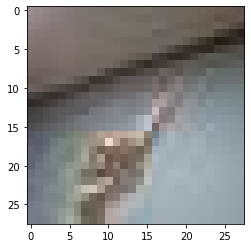

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.layers import Dropout
# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (5,5), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(n_channel_2, (5,5), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 4, 4, 32)          128       
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [21]:
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
10/10 [==============================] - 1s 26ms/step - loss: 1.2909 - accuracy: 0.5167
Epoch 2/10
10/10 [==============================] - 0s 28ms/step - loss: 0.3103 - accuracy: 0.8967
Epoch 3/10
10/10 [==============================] - 0s 29ms/step - loss: 0.1786 - accuracy: 0.9700
Epoch 4/10
10/10 [==============================] - 0s 30ms/step - loss: 0.1238 - accuracy: 0.9667
Epoch 5/10
10/10 [==============================] - 0s 30ms/step - loss: 0.1125 - accuracy: 0.9833
Epoch 6/10
10/10 [==============================] - 0s 28ms/step - loss: 0.0965 - accuracy: 0.9900
Epoch 7/10
10/10 [==============================] - 0s 26ms/step - loss: 0.0653 - accuracy: 0.9933
Epoch 8/10
10/10 [==============================] - 0s 26ms/step - loss: 0.0587 - accuracy: 0.9967
Epoch 9/10
10/10 [==============================] - 0s 26ms/step - loss: 0.0545 - accuracy: 0.9967
Epoch 10/10
10/10 [==============================] - 0s 29ms/step - loss: 0.0349 - accuracy: 1.0000


In [22]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.

def load_data2(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_train, y_train)=load_data2(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_train.shape))
print("y_test shape: {}".format(y_train.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [39]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1.9115 - accuracy: 0.6667
test_loss: 1.9115006923675537 
test_accuracy: 0.6666666865348816


In [24]:
#테스트 회고
predicted_result = model.predict(x_test)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.9214935e-01 7.4418010e-03 4.0888690e-04]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


예측확률분포: [0.8346465  0.16405459 0.00129892]
라벨: 1, 예측결과: 0


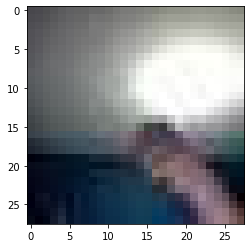

예측확률분포: [0.5795914  0.41527396 0.00513471]
라벨: 1, 예측결과: 0


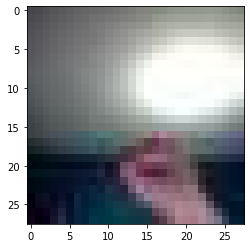

예측확률분포: [0.8463986  0.1489844  0.00461706]
라벨: 1, 예측결과: 0


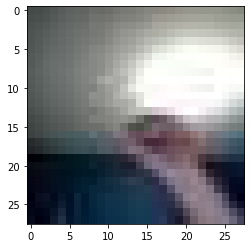

예측확률분포: [0.6926779  0.30599043 0.00133171]
라벨: 1, 예측결과: 0


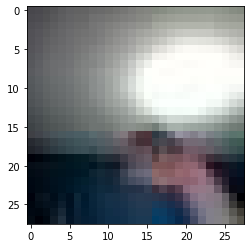

예측확률분포: [0.7264439  0.2720604  0.00149574]
라벨: 1, 예측결과: 0


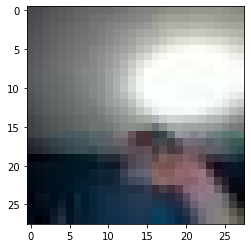

In [83]:
# model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [59]:
# 하이퍼파라미터 조정 - 채널 낮게, 드롭아웃 30%

from keras.layers import Dropout

n_channel_1=8
n_channel_2=16
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (2,2), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(n_channel_2, (2,2), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.3))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 27, 27, 8)         104       
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 13, 13, 8)         0         
_________________________________________________________________
batch_normalization_87 (Batc (None, 13, 13, 8)         32        
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 12, 12, 16)        528       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
batch_normalization_88 (Batc (None, 6, 6, 16)          64        
_________________________________________________________________
flatten_29 (Flatten)         (None, 576)             

In [71]:
# 하이퍼파라미터 조정2 - 채널 낮추고 에폭 높임

from keras.layers import Dropout

n_channel_1=4
n_channel_2=8
n_dense=8
n_train_epoch=20

model2=keras.models.Sequential()
model2.add(keras.layers.Conv2D(n_channel_1, (2,2), activation='relu', input_shape=(28,28,3)))
model2.add(keras.layers.MaxPool2D(2,2))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Conv2D(n_channel_2, (2,2), activation='relu'))
model2.add(keras.layers.MaxPooling2D((2,2)))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(n_dense, activation='relu'))
model2.add(keras.layers.BatchNormalization())
model2.add(Dropout(0.3))
model2.add(keras.layers.Dense(3, activation='softmax'))

model2.summary()
model2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model2.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model2.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 27, 27, 4)         52        
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 13, 13, 4)         0         
_________________________________________________________________
batch_normalization_123 (Bat (None, 13, 13, 4)         16        
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 12, 12, 8)         136       
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 6, 6, 8)           0         
_________________________________________________________________
batch_normalization_124 (Bat (None, 6, 6, 8)           32        
_________________________________________________________________
flatten_41 (Flatten)         (None, 288)             

In [99]:
# 하이퍼파라미터 조정3 - dense 3으로 맞추고 정규화 추가

from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler

n_channel_1=4
n_channel_2=8
n_dense=3
n_train_epoch=20

scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train.reshape(-1, 28*28*3)).reshape(-1, 28, 28, 3)
x_test_normalized = scaler.transform(x_test.reshape(-1, 28*28*3)).reshape(-1, 28, 28, 3)


model3=keras.models.Sequential()
model3.add(keras.layers.Conv2D(n_channel_1, (2,2), activation='relu', input_shape=(28,28,3)))
model3.add(keras.layers.MaxPool2D(2,2))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Conv2D(n_channel_2, (2,2), activation='relu'))
model3.add(keras.layers.MaxPooling2D((2,2)))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(n_dense, activation='relu'))
model3.add(keras.layers.BatchNormalization())
model3.add(Dropout(0.3))
model3.add(keras.layers.Dense(3, activation='softmax'))

model3.summary()
model3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model3.fit(x_train_normalized, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model3.evaluate(x_test_normalized, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_116 (Conv2D)          (None, 27, 27, 4)         52        
_________________________________________________________________
max_pooling2d_116 (MaxPoolin (None, 13, 13, 4)         0         
_________________________________________________________________
batch_normalization_174 (Bat (None, 13, 13, 4)         16        
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 12, 12, 8)         136       
_________________________________________________________________
max_pooling2d_117 (MaxPoolin (None, 6, 6, 8)           0         
_________________________________________________________________
batch_normalization_175 (Bat (None, 6, 6, 8)           32        
_________________________________________________________________
flatten_58 (Flatten)         (None, 288)             

In [109]:
# 하이퍼파라미터 조정4 - 리포트 추가

from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

n_channel_1=4
n_channel_2=8
n_dense=3
n_train_epoch=20

scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train.reshape(-1, 28*28*3)).reshape(-1, 28, 28, 3)
x_test_normalized = scaler.transform(x_test.reshape(-1, 28*28*3)).reshape(-1, 28, 28, 3)


model3=keras.models.Sequential()
model3.add(keras.layers.Conv2D(n_channel_1, (2,2), activation='relu', input_shape=(28,28,3)))
model3.add(keras.layers.MaxPool2D(2,2))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Conv2D(n_channel_2, (2,2), activation='relu'))
model3.add(keras.layers.MaxPooling2D((2,2)))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(n_dense, activation='relu'))
model3.add(keras.layers.BatchNormalization())
model3.add(Dropout(0.3))
model3.add(keras.layers.Dense(3, activation='softmax'))

model3.summary()
model3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model3.fit(x_train_normalized, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model3.evaluate(x_test_normalized, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")


# 예측 수행
y_pred = model3.predict(x_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)

# 분류 보고서 출력
class_names = ["가위", "바위", "보"]  # 클래스 이름을 적절히 변경하세요
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_136 (Conv2D)          (None, 27, 27, 4)         52        
_________________________________________________________________
max_pooling2d_136 (MaxPoolin (None, 13, 13, 4)         0         
_________________________________________________________________
batch_normalization_204 (Bat (None, 13, 13, 4)         16        
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 12, 12, 8)         136       
_________________________________________________________________
max_pooling2d_137 (MaxPoolin (None, 6, 6, 8)           0         
_________________________________________________________________
batch_normalization_205 (Bat (None, 6, 6, 8)           32        
_________________________________________________________________
flatten_68 (Flatten)         (None, 288)             